### Busara Mental Health Prediction Challenge

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import xgboost as xgb
plt.style.use('fivethirtyeight')

In [26]:
df = pd.read_csv(r'C:\Users\Patrick Munene\Desktop\Busara\train.csv')

In [27]:
#from fast.ai
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [28]:
 display_all(df.head())

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [29]:
display_all(df.isnull().sum())

surveyid                      0
village                       0
survey_date                   0
femaleres                     0
age                           0
married                       0
children                      0
hhsize                        0
edu                           0
hh_children                   0
hh_totalmembers             334
cons_nondurable               0
asset_livestock               0
asset_durable                 0
asset_phone                   0
asset_savings                 0
asset_land_owned_total        0
asset_niceroof                0
cons_allfood                  0
cons_ownfood                  0
cons_alcohol                 43
cons_tobacco                 20
cons_med_total                0
cons_med_children           419
cons_ed                       0
cons_social                   0
cons_other                    0
ent_wagelabor                 0
ent_ownfarm                   0
ent_business                  0
ent_nonagbusiness             0
ent_empl

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
surveyid                   1143 non-null int64
village                    1143 non-null int64
survey_date                1143 non-null object
femaleres                  1143 non-null int64
age                        1143 non-null float64
married                    1143 non-null int64
children                   1143 non-null int64
hhsize                     1143 non-null int64
edu                        1143 non-null int64
hh_children                1143 non-null int64
hh_totalmembers            809 non-null float64
cons_nondurable            1143 non-null float64
asset_livestock            1143 non-null float64
asset_durable              1143 non-null float64
asset_phone                1143 non-null float64
asset_savings              1143 non-null float64
asset_land_owned_total     1143 non-null float64
asset_niceroof             1143 non-null int64
cons_allfood               1143

## **Let's do some plotting to know how the data columns are distributed in the dataset**

C:\Users\Patrick Munene\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


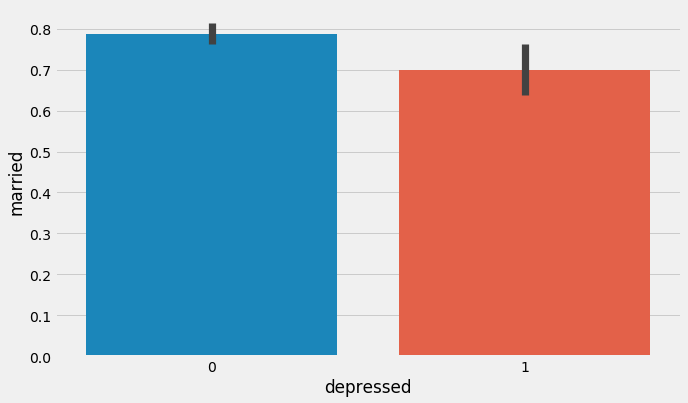

In [31]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'depressed', y = 'married', data = df)

In [32]:
df = df.drop(['surveyid','survey_date','hh_totalmembers','cons_med_children','fs_chskipm_often',
              'fs_meat','fs_enoughtom','fs_sleephun','med_expenses_hh_ep',
              'med_expenses_sp_ep','med_expenses_child_ep','med_portion_sickinjured',
              'med_port_sick_child','med_afford_port','med_sickdays_hhave','med_healthconsult',
              'med_u5_deaths','ed_expenses','ed_expenses_perkid','ed_schoolattend','ed_sch_missedpc',
              'ed_work_act_pc'], axis=1)


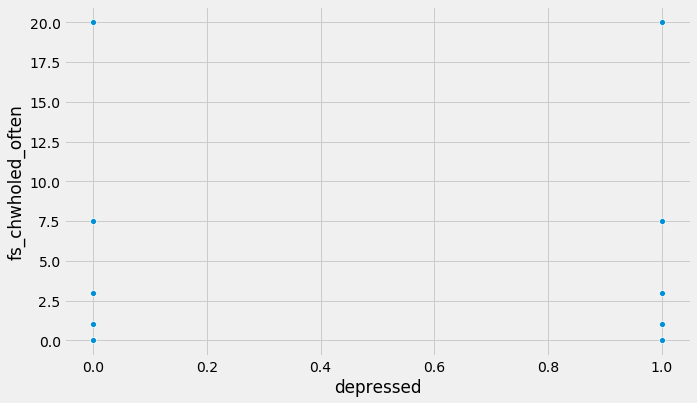

In [37]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
#sns.barplot(x = 'depressed', y = 'fs_chwholed_often', data = df)
sns.scatterplot(x="depressed", y="fs_chwholed_often", data=df)


In [40]:
#Replace fs_chwholed_often NaN with zero
df.fs_chwholed_often.fillna(value=0, inplace=True)

In [38]:
#Replace cons_alcohol NaN with avg
df['cons_alcohol'].fillna((df['cons_alcohol'].mean()), inplace=True)
df['cons_tobacco'].fillna((df['cons_tobacco'].mean()), inplace=True)

In [41]:
display_all(df.isnull().sum())

village                   0
femaleres                 0
age                       0
married                   0
children                  0
hhsize                    0
edu                       0
hh_children               0
cons_nondurable           0
asset_livestock           0
asset_durable             0
asset_phone               0
asset_savings             0
asset_land_owned_total    0
asset_niceroof            0
cons_allfood              0
cons_ownfood              0
cons_alcohol              0
cons_tobacco              0
cons_med_total            0
cons_ed                   0
cons_social               0
cons_other                0
ent_wagelabor             0
ent_ownfarm               0
ent_business              0
ent_nonagbusiness         0
ent_employees             0
ent_nonag_revenue         0
ent_nonag_flowcost        0
ent_farmrevenue           0
ent_farmexpenses          0
ent_animalstockrev        0
ent_total_cost            0
fs_adskipm_often          0
fs_adwholed_often   

In [42]:
 display_all(df.head())

,village,femaleres,age,married,children,hhsize,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chwholed_often,med_vacc_newborns,med_child_check,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,91,1,28.0,1,4,6,10,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,57,1,23.0,1,3,5,8,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,115,1,22.0,1,3,5,9,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,1,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,97,1,27.0,1,2,4,10,2,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,1,1,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,42,0,59.0,0,4,6,10,4,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,1,1,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


# Finding Important Features

In [59]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(['village','femaleres','age','married','children','hhsize','edu','hh_children','cons_nondurable','asset_livestock','asset_durable','asset_phone','asset_savings','asset_land_owned_total','asset_niceroof','cons_allfood','cons_ownfood','cons_alcohol','cons_tobacco','cons_med_total','cons_ed','cons_social','cons_other','ent_wagelabor','ent_ownfarm','ent_business','ent_nonagbusiness','ent_employees','ent_nonag_revenue','ent_nonag_flowcost','ent_farmrevenue','ent_farmexpenses','ent_animalstockrev','ent_total_cost','fs_adskipm_often','fs_adwholed_often','fs_chwholed_often','med_vacc_newborns','med_child_check','labor_primary','wage_expenditures','durable_investment','nondurable_investment','given_mpesa','amount_given_mpesa','received_mpesa','amount_received_mpesa','net_mpesa','saved_mpesa','amount_saved_mpesa','early_survey','day_of_week'
])
clf = RandomForestClassifier()
clf.fit(df[features], df['depressed'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

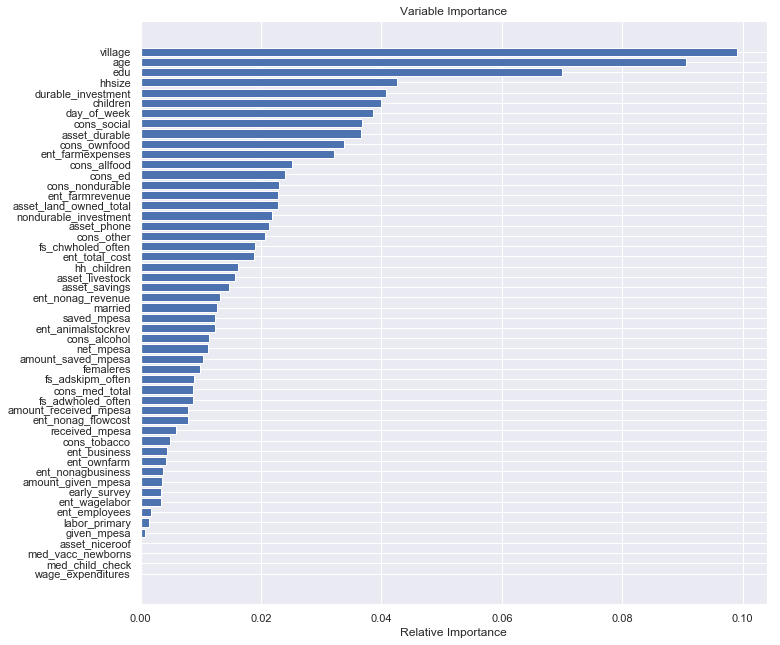

In [66]:
sns.set(rc={'figure.figsize':(10,10)})

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [43]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('depressed', axis = 1)
y = df['depressed']

In [44]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [45]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [46]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Our training and testing data is ready now to perform machine learning algorithm

### Random Forest Classifier

In [48]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [49]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))
print (mean_absolute_error(pred_rfc,y_test))

             precision    recall  f1-score   support

          0       0.81      0.99      0.89       229
          1       0.60      0.05      0.10        57

avg / total       0.77      0.80      0.73       286

0.1958041958041958


### XGBoost Classification

In [54]:
#Train the XGboost Model for Classification
xgc = xgb.XGBClassifier(n_estimators=100, 
                          max_depth=8, 
                          learning_rate=0.1, 
                          subsample=0.5)
xgc.fit(X_train, y_train)
pred_xgc = xgc.predict(X_test)


C:\Users\Patrick Munene\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
#Let's see how our model performed
print(classification_report(y_test, pred_xgc))
print (mean_absolute_error(pred_xgc,y_test))

             precision    recall  f1-score   support

          0       0.81      0.98      0.89       229
          1       0.43      0.05      0.09        57

avg / total       0.73      0.80      0.73       286

0.20279720279720279


# Predictions for test set

In [ ]:
df_test_set = pd.read_csv(r'C:\Users\Patrick Munene\Desktop\Busara\test.csv', low_memory=False)

#### Let's first format the data as we did for the training set.

In [ ]:
df_test_set = df.drop(['surveyid','survey_date','hh_totalmembers','cons_med_children','fs_chskipm_often',
              'fs_meat','fs_enoughtom','fs_sleephun','med_expenses_hh_ep',
              'med_expenses_sp_ep','med_expenses_child_ep','med_portion_sickinjured',
              'med_port_sick_child','med_afford_port','med_sickdays_hhave','med_healthconsult',
              'med_u5_deaths','ed_expenses','ed_expenses_perkid','ed_schoolattend','ed_sch_missedpc',
              'ed_work_act_pc'], axis=1)


### Now let's calculate predictions using the best model we trained.

In [ ]:
X_test = df_test_set.drop(['ride_id'], axis=1)
test_set_predictions = model5.predict(X_test)

### And finally let's create a csv file with predictions.

In [ ]:
d = {'ride_id': df_test_set["ride_id"], 'number_of_ticket': test_set_predictions}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[['ride_id','number_of_ticket']]

In [ ]:
df_predictions.head()

In [ ]:
#save to csv file
df_predictions.to_csv(r'C:\Users\Patrick Munene\Desktop\Busara\preds_test_set.csv', index=False)